In [4]:
pip install logitboost

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from logitboost import LogitBoost

In [3]:
X_train = pd.read_csv("gisette_train.data",sep=' ',header=None)
y_train = pd.read_csv("gisette_train.labels",sep=' ',header=None)
X_train.dropna(axis=1,how='all',inplace=True)
X_test = pd.read_csv("gisette_valid.data",sep=' ',header=None)
y_test = pd.read_csv("gisette_valid.labels",sep=' ',header=None)
X_test.dropna(axis=1,how='all',inplace=True)

FileNotFoundError: ignored

In [ ]:
ss=StandardScaler()
ss.fit(X_train)
tf_X_train=ss.transform(X_train)
tf_X_test=ss.transform(X_test)
y_train=y_train.replace(-1,0)
y_test=y_test.replace(-1,0)


In [ ]:
temp = np.array(y_train)
y_train = np.concatenate(temp)

In [ ]:
klist = [10, 30, 100, 300, 500]
missclassif_trainlist,missclassif_testlist=[],[]
for k in klist:
  lb = LogitBoost(base_estimator=None, n_estimators=k, weight_trim_quantile=0.05, max_response=4.0, learning_rate=1.0, bootstrap=False, random_state=None)
  lb.fit(tf_X_train,y_train)
  y_pred_train = lb.predict(tf_X_train)
  y_pred_test = lb.predict(tf_X_test)
  missclassif_trainlist.append((1-accuracy_score(y_train,y_pred_train.T))*6000)
  missclassif_testlist.append((1-accuracy_score(y_test, y_pred_test.T))*1000)
print(missclassif_trainlist, missclassif_testlist)



In [ ]:
temp1 = np.array(missclassif_trainlist)
temp1 = temp1/6000
training_error = temp1*100
temp2 = np.array(missclassif_testlist)
temp2 = temp2/1000
test_error = temp2*100

In [ ]:
training_error

In [ ]:
test_error

In [ ]:
lb = LogitBoost(base_estimator=None, n_estimators=500, weight_trim_quantile=0.05, max_response=4.0, learning_rate=1.0, bootstrap=False, random_state=None)
lb.fit(X_train,y_train)
iterations = np.arange(1, lb.n_estimators + 1)



In [ ]:
iterations

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
lol = lb.predict_proba(X_train)

In [ ]:
lol

array([[1.15562467e-08, 9.99999988e-01],
       [9.99987370e-01, 1.26302107e-05],
       [1.44029691e-04, 9.99855970e-01],
       ...,
       [9.99999968e-01, 3.24792330e-08],
       [9.99996606e-01, 3.39433770e-06],
       [1.00000000e+00, 4.73599042e-11]])

In [ ]:
lol.shape

(6000, 2)

In [ ]:
t = lol[:,1]

AttributeError: ignored

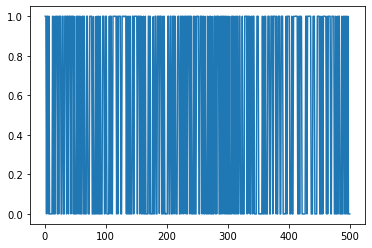

In [ ]:
plt.plot(range(1,501),p)